# LP-IV *Group B: Machine Learning*
### Problem Statement:
##### Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
##### Dataset Description: The case study is from an open-source dataset from Kaggle.
##### The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

##### Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points).
   
##### Link to the Kaggle project:
```bash
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

# 1. Import Required Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Read Dataset

In [36]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Preprocess data

#### a. Drop identifiers not usefull for prediction
#### b. Target variable
#### c. Features
#### d. Encode categorical features
#### e. Convert to float

In [37]:
df = df.drop(columns=["CustomerId", "Surname"])

y = df["Exited"].values

X = df.drop(columns=["Exited"])

le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"])  # Male/Female -> 0/1
X = pd.get_dummies(X, columns=["Geography"], drop_first=True)

X = X.astype(float)

print("Feature shape:", X.shape)

Feature shape: (10000, 12)


# 4. Train/test split & scaling

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Build ANN (Artificial Neural Network) model

In [39]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 192 (768.00 B)

# 6. Train with early stopping

In [40]:
es = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6231 - loss: 0.6973 - val_accuracy: 0.8167 - val_loss: 0.5330
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7619 - loss: 0.5182 - val_accuracy: 0.8342 - val_loss: 0.4336
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4607 - val_accuracy: 0.8533 - val_loss: 0.3858
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4307 - val_accuracy: 0.8617 - val_loss: 0.3602
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4088 - val_accuracy: 0.8617 - val_loss: 0.3456
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8272 - loss: 0.3995 - val_accuracy: 0.8642 - val_loss: 0.3373
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3942 - val_accuracy: 0.8642 - val_loss: 0.3320
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.3897 - val_accu

# 7. Evaluate Model

#### a. Accuracy & report
#### b. Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



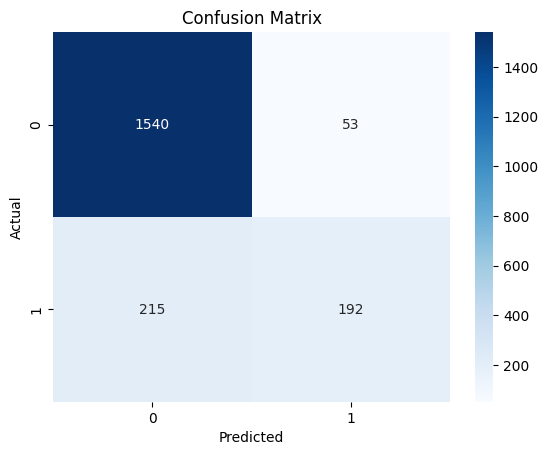

In [41]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8. Plot training history

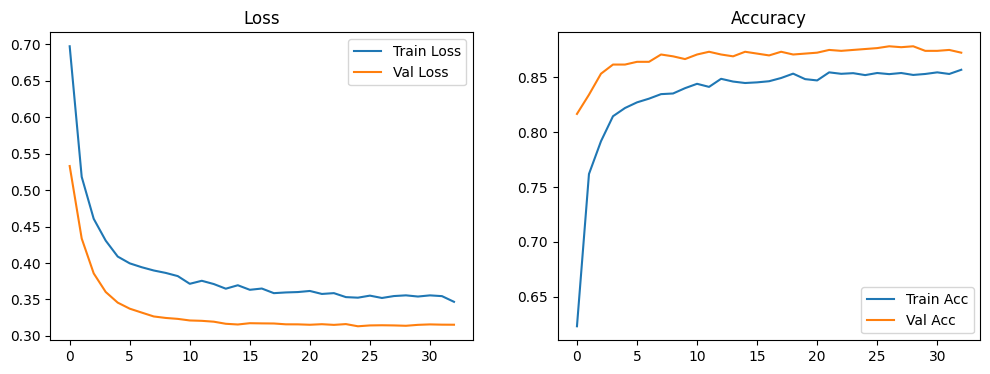

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.show()